In [41]:
from pinballrt.densities.flared_disk import FlaredDisk
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from matplotlib.colors import LogNorm, PowerNorm

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
disk = FlaredDisk()

In [31]:
disk.params

{'LogMass': {'value': -4,
  'range': (-6, -2),
  'fixed': False,
  'units': Unit("solMass")},
 'LogRmin': {'value': -1.0,
  'range': (-3.0, 0.0),
  'fixed': False,
  'units': Unit("AU")},
 'LogRmax': {'value': 2.0,
  'range': (1.0, 3.0),
  'fixed': False,
  'units': Unit("AU")},
 'p': {'value': -1, 'range': (0.0, -2.0), 'fixed': False, 'units': None},
 'beta': {'value': 1.25, 'range': (1.0, 2.0), 'fixed': False, 'units': None},
 'R_0': {'value': 1.0,
  'range': (0.0, 10.0),
  'fixed': True,
  'units': Unit("AU")},
 'LogH_0': {'value': -1,
  'range': (-2, 1),
  'fixed': False,
  'units': Unit("AU")}}

In [32]:
disk.print_param_names()

['LogMass', 'LogRmin', 'LogRmax', 'p', 'beta', 'R_0', 'LogH_0']


In [33]:
disk.set_params(params= "beta", value=1.5)
disk.set_params("p", fixed=True)
disk.set_params("LogMass", range=(-5., -1.))
disk.params

{'LogMass': {'value': -4,
  'range': (-5.0, -1.0),
  'fixed': False,
  'units': Unit("solMass")},
 'LogRmin': {'value': -1.0,
  'range': (-3.0, 0.0),
  'fixed': False,
  'units': Unit("AU")},
 'LogRmax': {'value': 2.0,
  'range': (1.0, 3.0),
  'fixed': False,
  'units': Unit("AU")},
 'p': {'value': -1, 'range': (0.0, -2.0), 'fixed': True, 'units': None},
 'beta': {'value': 1.5, 'range': (1.0, 2.0), 'fixed': False, 'units': None},
 'R_0': {'value': 1.0,
  'range': (0.0, 10.0),
  'fixed': True,
  'units': Unit("AU")},
 'LogH_0': {'value': -1,
  'range': (-2, 1),
  'fixed': False,
  'units': Unit("AU")}}

In [34]:
disk.mass

<Quantity 1.e-06 solMass>

In [35]:
r_arr = np.linspace(0.1, 200, 200) * u.au

sigma = disk.surface_density(r=r_arr)

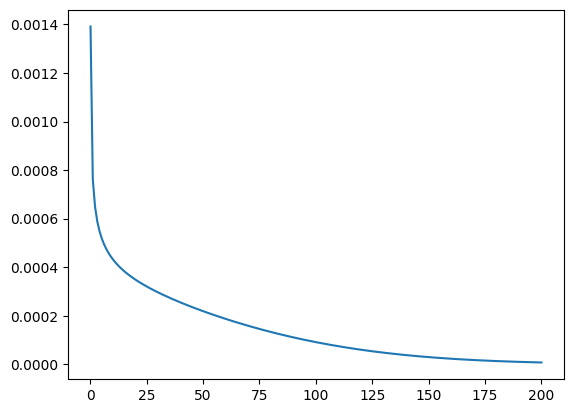

In [36]:
plt.plot(r_arr, sigma)
plt.show()

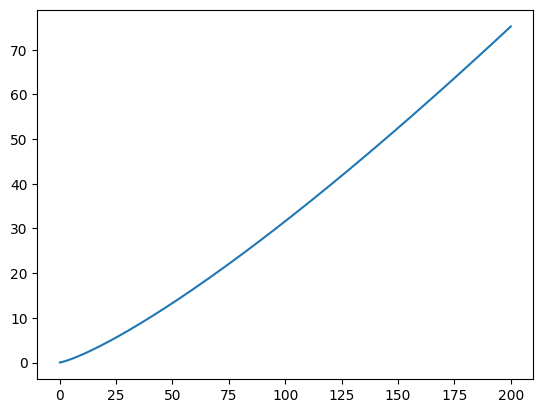

In [37]:
h = disk.scale_height(r=r_arr)

plt.plot(r_arr, h)
plt.show()

In [38]:
z_min = -200 * u.au
z_max = 200 * u.au
z_arr = np.linspace(z_min, z_max, 100)

In [39]:
rr, zz = np.meshgrid(r_arr, z_arr, indexing='ij')

density = disk.density(r=rr, z=zz).value

np.shape(density)

(200, 100)

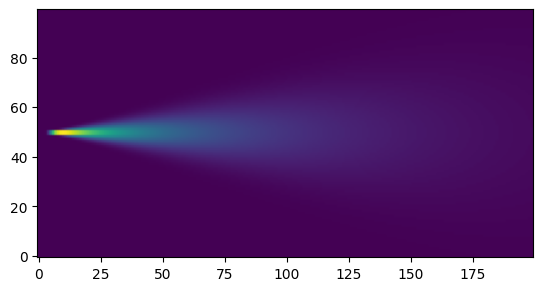

In [40]:
plt.imshow(np.transpose(density), origin='lower', norm=PowerNorm(0.5))
plt.show()
